<a href="https://www.kaggle.com/code/vsetang/oakland-crime-data-2011-2016?scriptVersionId=157562000" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        os.path.join(dirname, filename)
        
# Any results you write to the current directory are saved as output.

In [2]:
def add_month_year_columns(df):
    df['Month'] = df['Create Time'].dt.month
    df['Year'] = df['Create Time'].dt.year
    df['Time'] = df['Create Time'].dt.time
    return df

In [3]:
#Create dictionary of dataframe for each year
cols = ['Create Time', 'Priority', 'Incident Type Id', 'Incident Type Description','Closed Time']
year_dict = {}
for yr in range(2011, 2017):
    year_dict[yr] = pd.read_csv('/kaggle/input/oakland-crime-statistics-2011-to-2016/records-for-'+str(yr)+'.csv',usecols=cols, parse_dates=['Create Time','Closed Time'])


In [4]:
#Merge data frames
frames = [year_dict[2011], year_dict[2012], year_dict[2013],year_dict[2014],year_dict[2015],year_dict[2016]]
for f in frames:
    add_month_year_columns(f)


In [5]:
#Iterate through each year data frame to create a frame grouped by month
crime_permonth={}
for yr in range(2011, 2017):
    crime_permonth[yr] = year_dict[yr].groupby(['Month','Year'])['Priority'].count().reset_index(drop=False)
    

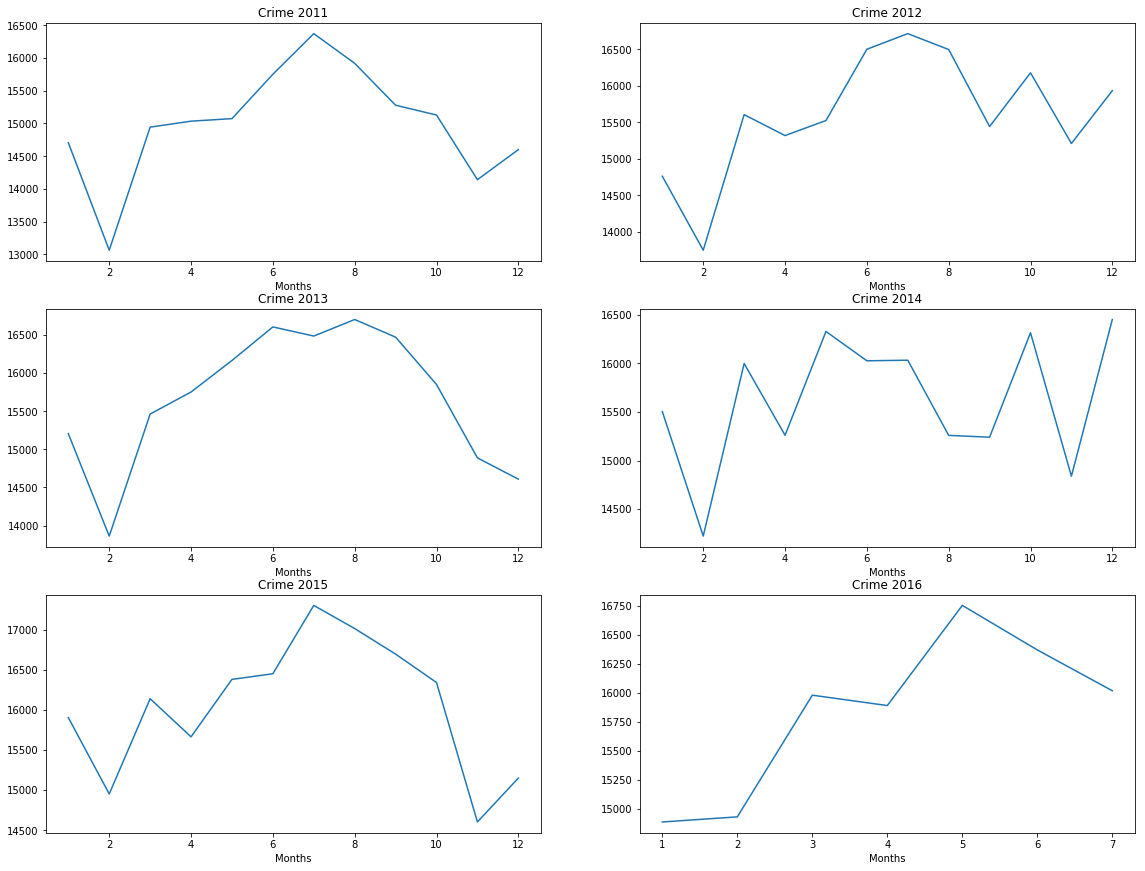

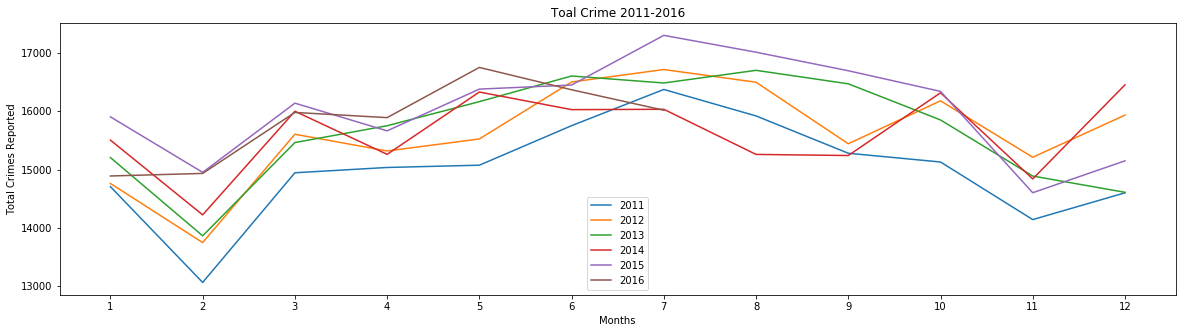

In [6]:
#Plot total of crimes per month among all years 
fig, ax = plt.subplots(3, 2, figsize=(11,6))

for i, yr in enumerate(range(2011,2017)):
    c = i%2
    r= int(i/2)
    ax[r,c].plot(crime_permonth[yr]['Month'], crime_permonth[yr]['Priority'], label=str(yr))
    ax[r,c].set_title('Crime '+ str(yr)) 
    ax[r,c].set_xlabel('Months')
    plt.subplots_adjust(top=2, right=1.5)

fig, axs = plt.subplots(figsize=(20,5))
for yr in range(2011, 2017):
    axs.plot(crime_permonth[yr]['Month'], crime_permonth[yr]['Priority'], label=str(yr)); 

plt.title('Toal Crime 2011-2016')
plt.xlabel('Months'); plt.ylabel('Total Crimes Reported')
plt.xticks(np.arange(1, 13, 1))
plt.legend()
plt.show()

It seems that crime goes on the rise starting around spring and declines when going into winter. Crime increased drastically through out the year in 2016

Text(0.5, 1.0, 'Top 10 Crimes in Oakland')

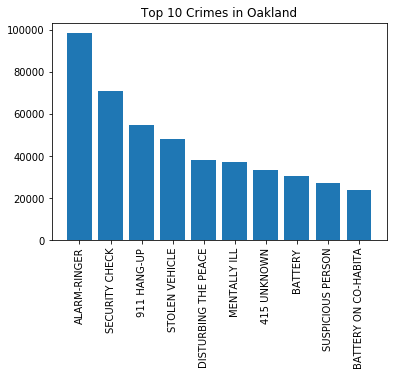

In [7]:
#Merged dataset
merged_set = pd.concat(frames)

#Subset top crimes in Oakland
top_crimes = merged_set.groupby('Incident Type Description')['Priority'].count().reset_index(drop=False)
top_crimes = top_crimes.sort_values(by='Priority', ascending=False).head(10)
top_crimes.columns = ['Incident Type Description', 'Counts']
plt.bar(top_crimes['Incident Type Description'], top_crimes['Counts'])
plt.xticks(rotation=90); plt.title('Top 10 Crimes in Oakland')


The top crime from years between 2013 to 2016 was "Alarm-Ringer"

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


<BarContainer object of 24 artists>

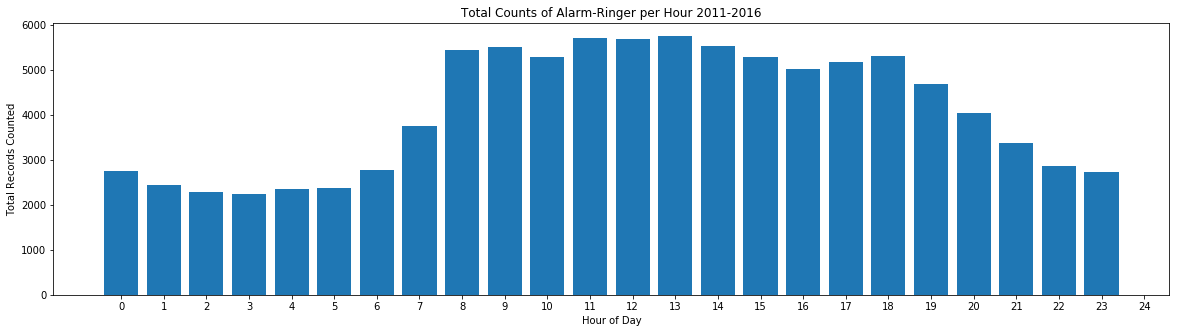

In [8]:
#Subset top crime "Alarm-Ringer" and subset them per hour
crimes_hours = merged_set.loc[(merged_set['Incident Type Description']=='ALARM-RINGER')]
crimes_hours['Hour'] = crimes_hours['Create Time'].dt.hour
crimes_hours = crimes_hours.groupby('Hour')['Time'].count().reset_index(drop=False)

plt.figure(figsize=(20,5))
plt.title('Total Counts of Alarm-Ringer per Hour 2011-2016')
plt.xlabel('Hour of Day'); plt.ylabel('Total Records Counted')
plt.xticks(np.arange(0, 25, 1))
plt.bar(crimes_hours['Hour'],crimes_hours['Time'])

It appears that crime does in fact occur more often during the day time